<a href="https://colab.research.google.com/github/Kei-Kobayash/multiple_smiles/blob/main/smile_N170_27pars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Smile#_120-140&180-200.csv")

df.head()

,ERPset,EC_group,Total,FS,EC,PD,PT,smile0_P7,smile0_P8,smile1_P7,...,smile3_PO8,target_PO7,target_PO8,smile1-0_PO7,smile1-0_PO8,smile2-0_PO7,smile2-0_PO8,smile3-0_PO7,smile3-0_PO8,ERPset.1
0,s1,low,83,22,22,12,27,-1.961,-2.134,-1.711,...,5.435,8.217,6.326,-0.622,-0.761,0.491,-0.315,-0.531,-0.135,s1
1,s2,low,84,15,21,23,25,-3.125,-3.066,-3.247,...,6.620,10.081,7.557,1.444,-1.975,-1.407,-3.758,-0.684,-3.166,s2
2,s3,low,83,30,24,11,18,-3.082,-1.648,-1.275,...,11.496,7.010,13.091,2.129,1.008,0.635,1.119,1.004,3.053,s3
3,s8,low,92,27,19,13,33,0.367,0.348,-0.017,...,11.672,15.328,13.514,-4.258,-4.475,-1.236,0.149,-2.467,-1.207,s8
4,s11,low,72,13,21,18,20,0.728,2.137,-0.615,...,5.049,3.117,6.173,-0.324,-0.976,-0.582,-0.271,-0.157,-0.292,s11


In [ ]:
conditions = df.columns.values

#number of participants
pars_num = len(df["ERPset"].unique())

#creating lists of conditions
P7_conditions = conditions[7:15:2]
P8_conditions = conditions[8:15:2]

#条件リスト名を引数として渡すと、平均と標準誤差をそれぞれリストとして返す関数

def ave_sem(data, cond_list, pars_num):
  mean_list = []
  std_list = []
  for cond in cond_list:
    mean_list.append(round(data[cond].mean(), 3))
    std_list.append(round(data[cond].std(), 3))
  sem_list = list(map(lambda x:round(x/np.sqrt(pars_num), 3),std_list))

  return mean_list, sem_list

  #print(mean_list)
  #print(std_list)
  #print(sem_list)

#関数を使う

P7_ave, P7_sem = ave_sem(df, P7_conditions, pars_num)
P8_ave, P8_sem = ave_sem(df, P8_conditions, pars_num)

print(P8_conditions)
print(P7_ave)

['smile0_P8' 'smile1_P8' 'smile2_P8' 'smile3_P8']
[-3.202, -3.309, -3.369, -3.274]


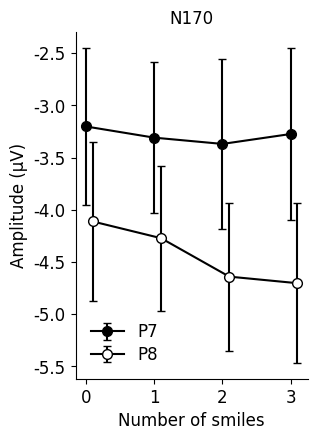

In [ ]:
## 折れ線グラフを描く（2つの線）

#plt.plot(hemisub_ave)

#リストを引数で渡す
def plotting(list1, title, ylist):
  fontsize = 12
  fig, ax1 = plt.subplots(figsize=(3, 4.5))

  #list1 = [[P7_ave][P7_sem]]
  x = [0, 1, 2, 3]
  marker_colors = ["black", "white"]
  labels = ["P7", "P8"]

  for list_list, list_err, n, marker_color, label in zip(list1[0], list1[1], [1, 2], marker_colors, labels):
    x = list(map(lambda x: x+0.1*(n-1), x))
    ax1.errorbar(x = x, y = list_list, yerr = list_err, capsize=3, color = "black", marker = "o", markersize = 7, markeredgecolor = "black", markerfacecolor = marker_color, label = label)
  ax1.set_xlabel("Number of smiles", fontsize = fontsize)
  ax1.set_ylabel("Amplitude (μV)", fontsize = fontsize)
  ax1.set_title(title, fontsize = fontsize)

  ax1.set_xticks([0, 1, 2, 3])
  ax1.set_xticklabels([0, 1, 2, 3], fontsize = fontsize)
  ax1.set_yticks(ylist)
  ax1.set_yticklabels(ylist, fontsize = fontsize)

  ax1.spines["top"].set_visible(False)
  ax1.spines["right"].set_visible(False)

  ax1.legend(prop={"size": fontsize}, framealpha =1.0, edgecolor = "#FFFFFF", labelspacing = 0.28, numpoints=0.3)
  plt.savefig("all_Psychophysiology2023_"+title+"_graph.png", format="png", dpi=500, bbox_inches = "tight")

#plotting(hemisub_ave, hemisub_sem)

plotting([[P7_ave, P8_ave],[P7_sem, P8_sem]], "N170", np.arange(-5.5, -2.3, 0.5).tolist())